In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
ins =pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
ins.shape

(1338, 7)

In [6]:
ins.info()  # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
ins.sex = np.where(ins.sex == 'female',0,1)
ins.smoker = np.where(ins.smoker == 'yes',1,0)
ins = pd.get_dummies(ins, columns = ['region'])   # When we have more than two categories in Linear Regression Dataset then we use this

In [10]:
ins.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [11]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age                 1338 non-null int64
sex                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
smoker              1338 non-null int64
charges             1338 non-null float64
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.0 KB


In [12]:
y = ins['charges']

In [13]:
X = ins.copy()

In [14]:
X = X.drop('charges',axis=1)

In [15]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## Building Correlation Matrix

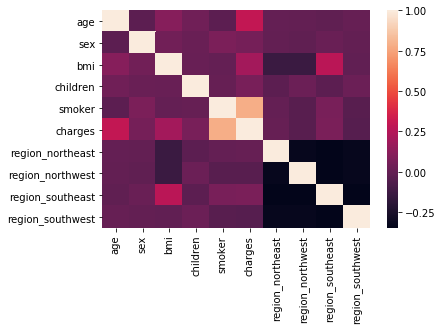

In [16]:
sns.heatmap(ins.corr()) # Corr is for numerical data

## Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

## Fitiing Multiple Linera Regression Model to Training Set

In [18]:
model_fit=LinearRegression()

In [19]:
model_fit.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting Test Set Result

In [20]:
y_pred = model_fit.predict(X_test)

## Calculating Coefficients Intercepts

In [21]:
print(model_fit.coef_)

[ 2.53700500e+02 -1.54637279e+01  3.35962814e+02  4.36910121e+02
  2.36050173e+04  4.83840068e+02  2.23707336e+02 -4.29438766e+02
 -2.78108638e+02]


In [22]:
print(model_fit.intercept_)

-12311.913605650474


## Evaluate Model & Calculate R Squared Value

In [23]:
r2_score(y_test, y_pred)

0.7999876970680433